In [8]:
import numpy as np
import os, sys
os.chdir("..")
sys.path.append(os.getcwd())

In [9]:
import numpy as np
import matplotlib.pyplot as plt

from utils.base import Function
from utils.plot_helpers import plot_loss_curves, plot_contour_comparison


from utils.test_functions import (
    Rosenbrock, 
    Quadratic, 
    generate_linear_regression_data, 
    linear_regression_loss, 
    linear_regression_gradient
)


from optimizers.adaptive import (
    Adagrad,
    RMSProp,
    Adam
)


%matplotlib inline

## 1. Contour Plot: Adaptive Methods on Rosenbrock

This plot compares the optimization paths of `Adagrad`, `RMSProp`, and `Adam` on the 2D Rosenbrock function.

Adaptive methods adjust the learning rate for each parameter automatically, which often makes them less sensitive to the initial learning rate (`alpha`) and more effective at navigating difficult landscapes like this one.

Running Adagrad...
Found solution: [0.99963582 0.99926033] in 50001 iterations.

Running RMSProp...
Found solution: [0.81363636 0.79836777] in 50001 iterations.

Running Adam...
Found solution: [0.99999899 0.99999796] in 1511 iterations.



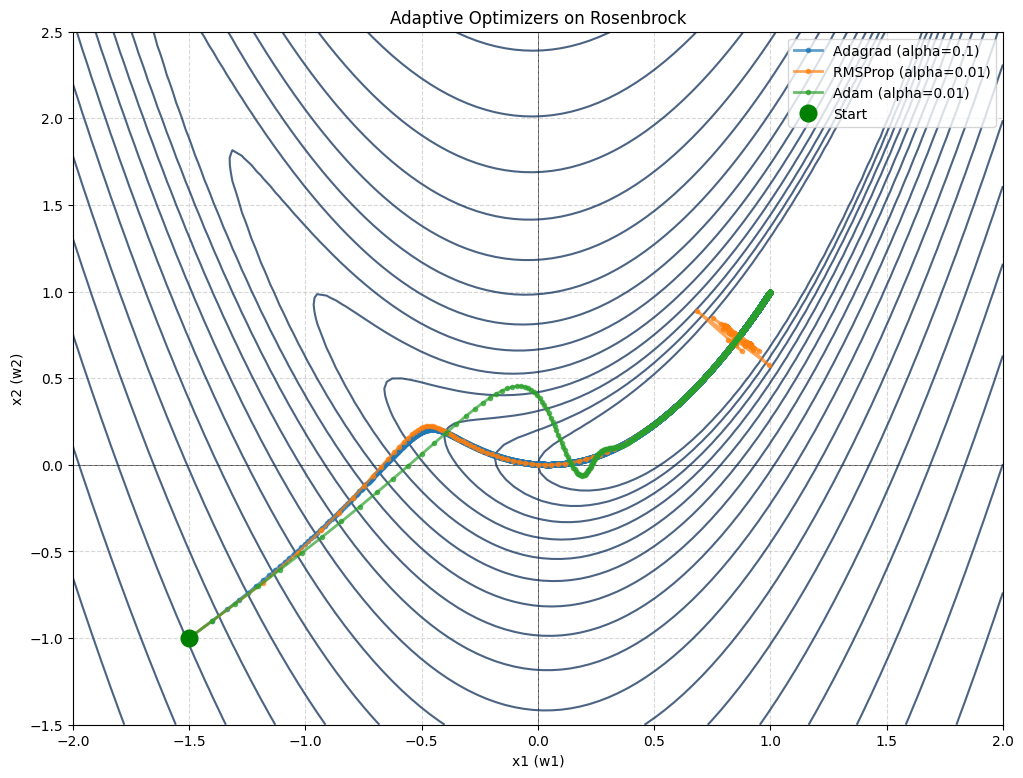

In [10]:
adagrad = Adagrad(alpha=0.1)
rmsprop = RMSProp(alpha=0.1)
adam = Adam(alpha=0.1)    


start_point = np.array([-1.5, -1.0])


print("Running Adagrad...")
sol_ada, history_ada = adagrad.optimize(
    x=start_point.copy(),
    func_callback=Rosenbrock,
    grad_func_callback=Rosenbrock.grad,
    hessian_func_callback=Rosenbrock.hessian,
    is_plot=True 
)
print(f"Found solution: {sol_ada} in {adagrad.num_iter} iterations.\n")


print("Running RMSProp...")
sol_rms, history_rms = rmsprop.optimize(
    x=start_point.copy(),
    func_callback=Rosenbrock,
    grad_func_callback=Rosenbrock.grad,
    hessian_func_callback=Rosenbrock.hessian,
    is_plot=True
)
print(f"Found solution: {sol_rms} in {rmsprop.num_iter} iterations.\n")

print("Running Adam...")
sol_adam, history_adam = adam.optimize(
    x=start_point.copy(),
    func_callback=Rosenbrock,
    grad_func_callback=Rosenbrock.grad,
    hessian_func_callback=Rosenbrock.hessian,
    is_plot=True
)
print(f"Found solution: {sol_adam} in {adam.num_iter} iterations.\n")


# --- 4. Plot Comparison ---
plot_contour_comparison(
    func_callable=Rosenbrock,
    histories={
        f"Adagrad (alpha=0.1)": history_ada,
        f"RMSProp (alpha=0.01)": history_rms,
        f"Adam (alpha=0.01)": history_adam
    },
    x_range=(-2, 2),
    y_range=(-1.5, 2.5), # Zoom in on the Rosenbrock valley
    title="Adaptive Optimizers on Rosenbrock"
)

## 2. Application Plot: Adaptive Methods on Linear Regression

This plot compares the convergence speed of the adaptive optimizers on our linear regression problem. 

Since `Adagrad`, `RMSProp`, and `Adam` are all *batch* methods (they use the full gradient), we will compare them against each other using the same batch loss function.

In [11]:
N = 200  # Number of data points
d = 1    # Number of features
X_aug, Y, W_true = generate_linear_regression_data(N=N, d=d)

print(f"Data shape (X_aug): {X_aug.shape}")
print(f"Data shape (Y): {Y.shape}")
print(f"True weights (W_true): \n{W_true}\n")


W_initial_2D = np.random.randn(d + 1, 1)
W_initial_1D = W_initial_2D.flatten() 
print(f"Initial weights (W_initial): \n{W_initial_2D}\n")



def batch_loss_wrapper(W_1D):
    W_2D = W_1D.reshape(-1, 1)
    return linear_regression_loss(W_2D, X_aug, Y)

def batch_grad_wrapper(W_1D):
    W_2D = W_1D.reshape(-1, 1)
    return linear_regression_gradient(W_2D, X_aug, Y).flatten()


linear_reg_func = Function(
    func=batch_loss_wrapper,
    grad_func=batch_grad_wrapper,
    name="Linear Regression MSE"
)


def final_loss_plotter(W):
    W_2D = W.reshape(-1, 1) # Ensure W is 2D
    return linear_regression_loss(W_2D, X_aug, Y)

Data shape (X_aug): (200, 2)
Data shape (Y): (200, 1)
True weights (W_true): 
[[2.03174551]
 [0.33245359]]

Initial weights (W_initial): 
[[-1.3341108 ]
 [ 0.59045816]]



Running Adagrad on Linear Regression...
Adagrad done in 20434 iterations.

Running RMSProp on Linear Regression...
RMSProp done in 50001 iterations.

Running Adam on Linear Regression...
Adam done in 3704 iterations.


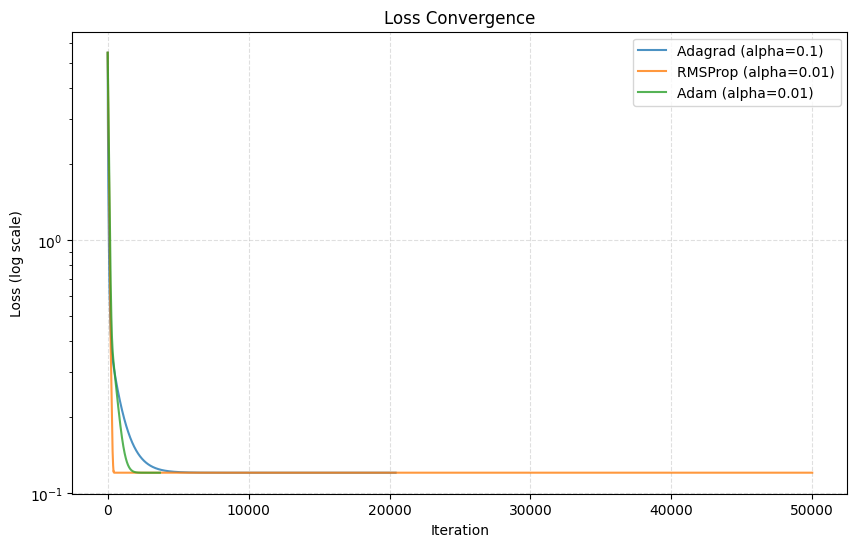

In [13]:

adagrad_lr = Adagrad(alpha=0.1)
rmsprop_lr = RMSProp(alpha=0.01)
adam_lr = Adam(alpha=0.01)


print("Running Adagrad on Linear Regression...")
sol_ada_lr, hist_ada_lr = adagrad_lr.optimize(
    x=W_initial_1D.copy(),
    func_callback=linear_reg_func,
    grad_func_callback=linear_reg_func.grad,
    is_plot=True
)
print(f"Adagrad done in {adagrad_lr.num_iter} iterations.")


print("\nRunning RMSProp on Linear Regression...")
sol_rms_lr, hist_rms_lr = rmsprop_lr.optimize(
    x=W_initial_1D.copy(),
    func_callback=linear_reg_func,
    grad_func_callback=linear_reg_func.grad,
    is_plot=True
)
print(f"RMSProp done in {rmsprop_lr.num_iter} iterations.")


print("\nRunning Adam on Linear Regression...")
sol_adam_lr, hist_adam_lr = adam_lr.optimize(
    x=W_initial_1D.copy(),
    func_callback=linear_reg_func,
    grad_func_callback=linear_reg_func.grad,
    is_plot=True
)
print(f"Adam done in {adam_lr.num_iter} iterations.")


plot_loss_curves(
    histories={
        "Adagrad (alpha=0.1)": hist_ada_lr,
        "RMSProp (alpha=0.01)": hist_rms_lr,
        "Adam (alpha=0.01)": hist_adam_lr
    },
    loss_func_callable=final_loss_plotter
)